In [95]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix




In [96]:
data = pd.read_csv('dataset/Train_data.csv')
test_data = pd.read_csv('dataset/Test_data.csv')

data = data.drop(columns=['protocol_type', 'service', 'flag'])

X_test_2 = test_data.drop(columns=['protocol_type', 'service', 'flag'])


data.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


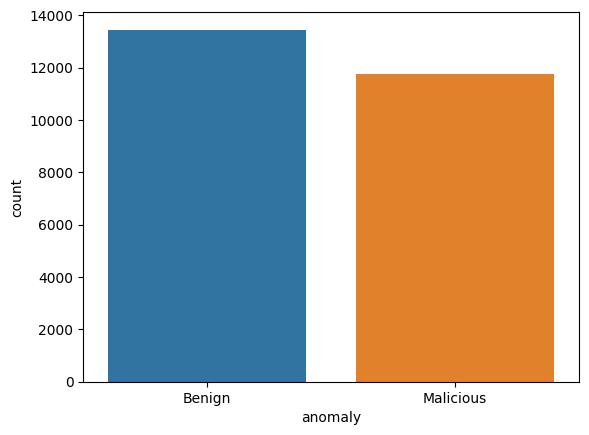

In [97]:
data_anomaly = data[data['class'] == 'anomaly']
data_normal = data[data['class'] == 'normal']

df_count = pl.DataFrame({'anomaly': ['Benign', 'Malicious'], 'count': [data_normal.shape[0], data_anomaly.shape[0]]})
sns.barplot(x='anomaly', y='count', hue='anomaly', data=df_count)
plt.show()


In [98]:
data.columns

Y = data['class']
X = data.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)



In [99]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

X_test_2 = scaler.transform(X_test_2)

In [100]:
clf = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['normal', 'anomaly']))

              precision    recall  f1-score   support

      normal       0.94      0.95      0.94      1165
     anomaly       0.95      0.95      0.95      1355

    accuracy                           0.95      2520
   macro avg       0.95      0.95      0.95      2520
weighted avg       0.95      0.95      0.95      2520

